In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Reading the Dataset

In [2]:
data = pd.DataFrame(pd.read_csv("IRIS.csv"))

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Data Understanding

In [4]:
data.shape

(150, 5)

In [5]:
data.head(10)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data[data.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [9]:
data.query(" sepal_length == 4.9 and species == 'Iris-setosa'")

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa


# Visualizing Data

In [10]:
import plotly.express as px

In [11]:
data = data[~data.duplicated()].copy()

In [12]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
FEATURES = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
TARGET = ['species']

In [14]:
def get_X_y(data: pd.DataFrame, FEATURES: list=FEATURES, TARGET: list=TARGET) -> tuple[pd.DataFrame, pd.DataFrame]: 
    data = data.sample(frac=1, random_state=49)
    X = data[FEATURES].reset_index(drop=True)
    y = data[TARGET].reset_index(drop=True)
    
    return X, y
    

In [15]:
X, y = get_X_y(data, FEATURES, TARGET)

In [16]:
fig = px.scatter(
    data, x='sepal_width', y='sepal_length', color='species', size='petal_length', trendline='ols', marginal_y='violin', marginal_x='box', 
    width=900, height=600
)

fig.show()

In [17]:
fig = px.scatter_matrix(
    data, dimensions=FEATURES, color='species'
    , width=1200, height=900
)

fig.show()

# Univariate

In [18]:
fig = px.histogram(
    data, x='petal_length', color='species', histnorm='probability density'
)

fig.show()

# Data Prep & Model Selection
- Need a classification model
- Minimum changes needed to data

- Models to try:
    - svm
    - K-means
    - KNN
    - Tree-based (Decision Tree/Random Forest)
    - Logistic Regression

In [19]:
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, roc_auc_score

In [20]:
X, y = get_X_y(data, FEATURES, TARGET)

<Axes: >

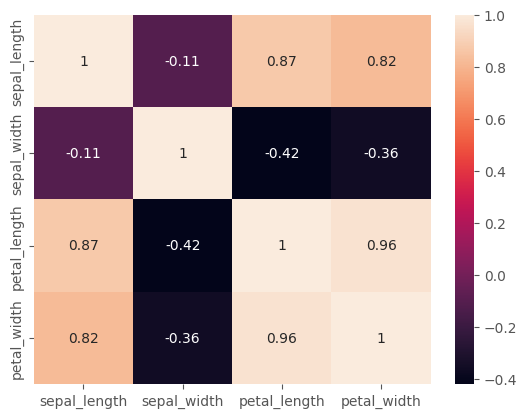

In [21]:
sns.heatmap(
    X.corr(), annot=True 
)

In [22]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.9,3.2,4.8,1.8
1,4.7,3.2,1.3,0.2
2,5.8,2.6,4.0,1.2
3,6.4,2.7,5.3,1.9
4,6.4,2.8,5.6,2.2


In [23]:
y.head()

,species
0,Iris-versicolor
1,Iris-setosa
2,Iris-versicolor
3,Iris-virginica
4,Iris-virginica


# Setup Cross Validation
- Data has 4 numeric columns and three classes, with somewhat uniform distribution
- No Grouping
- Best Choices: StratifiedKFold or KFold

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()
data['species'] = le.fit_transform(data[TARGET].to_numpy().ravel())

In [25]:
ss = StandardScaler()
data[FEATURES] = ss.fit_transform(data[FEATURES], data[TARGET])

In [26]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.915509,1.019971,-1.357737,-1.335700,0
1,-1.157560,-0.128082,-1.357737,-1.335700,0
2,-1.399610,0.331139,-1.414778,-1.335700,0
3,-1.520635,0.101529,-1.300696,-1.335700,0
4,-1.036535,1.249582,-1.357737,-1.335700,0
...,...,...,...,...,...
145,1.020892,-0.128082,0.809831,1.444682,2
146,0.536792,-1.276136,0.695748,0.915085,2
147,0.778842,-0.128082,0.809831,1.047484,2
148,0.415766,0.790361,0.923913,1.444682,2


In [27]:
fig = px.scatter_matrix(
    data, dimensions=FEATURES, color="species", width=1200, height=900
)

fig.show()

In [28]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=49)

In [29]:
def get_train_holdout(data: pd.DataFrame, FEATURES: list, TARGET: list, frac : float = .15):
    holdout_ids = data.sample(frac = frac, random_state=49).index
    
    train = data.loc[~data.index.isin(holdout_ids)] \
                .sample(frac=1, random_state=49) \
                .reset_index(drop=True)
    
    holdout = data.loc[data.index.isin(holdout_ids)] \
                    .sample(frac=1, random_state=49) \
                    .reset_index(drop=True)
                    
    return train, holdout

In [30]:
train, holdout = get_train_holdout(data, FEATURES, TARGET)

In [31]:
train

,sepal_length,sepal_width,petal_length,petal_width,species
0,-1.036535,0.790361,-1.243654,-1.070902,0
1,-1.157560,-1.276136,0.410542,0.650287,2
2,-1.762685,-0.128082,-1.414778,-1.335700,0
3,2.231143,-0.128082,1.323202,1.444682,2
4,-0.794484,0.790361,-1.357737,-1.335700,0
...,...,...,...,...,...
120,1.020892,0.101529,0.353501,0.253089,1
121,1.262942,0.101529,0.923913,1.179883,2
122,1.383967,0.331139,0.524624,0.253089,1
123,0.536792,0.560750,0.524624,0.517888,1


In [32]:
holdout

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.657817,-0.816914,0.866872,0.915085,2
1,1.020892,-0.128082,0.809831,1.444682,2
2,-0.310384,-0.128082,0.410542,0.385489,1
3,-0.431409,1.019971,-1.414778,-1.335700,0
4,1.020892,0.560750,1.095037,1.709480,2
5,-0.915509,1.708804,-1.243654,-1.335700,0
6,0.657817,-0.587304,1.037996,1.312282,2
7,-0.915509,1.708804,-1.300696,-1.203301,0
8,0.173716,-0.357693,0.410542,0.385489,1
9,-1.157560,-0.128082,-1.357737,-1.335700,0


In [41]:
def run_model(model_name, fold_name, train: pd.DataFrame=train, holdout: pd.DataFrame=holdout, FEATURES=FEATURES, TARGET=TARGET):
    # Accessing features and labels
    X_train, y_train = get_X_y(train)
    X_holdout, y_holdout = get_X_y(holdout)

    # Setting up Stratified K Fold Cross Validation with 5 splits and shuffling enabled
    fold_model = fold_name(n_splits=5, shuffle=True)
    fold=0
    prob=False
    acc = []
    roc = []
    for train_ids, val_ids in fold_model.split(X_train, y_train):
        fold+=1
        print(f"-------------- FOLD {fold} --------------")
        # Splitting train set into train and validation sets
        X_tr = X_train.loc[train_ids].reset_index(drop=True)
        y_tr = y_train.loc[train_ids].reset_index(drop=True)

        X_val = X_train.loc[val_ids].reset_index(drop=True)
        y_val = y_train.loc[val_ids].reset_index(drop=True)

        model = model_name()
        model.fit(X_tr, y_tr.to_numpy().ravel())

        pred = model.predict(X_val)
        try: 
            pred_prob = model.predict_proba(X_val)
            prob=True
        except AttributeError:
            pass

        print('On Validation Set')
        print(
            f"The accuracy score: {accuracy_score(y_val, pred)}"
            + (f" & roc score: {roc_auc_score(y_val, pred_prob, multi_class='ovr')}\n"
            if prob
            else "\n")
        )
        
        print('On Holdout Set')
        pred_holdout = model.predict(X_holdout)
        try:
            pred_prob_holdout = model.predict_proba(X_holdout)
            prob = True
        except AttributeError:
            pass
        print(
            f"The accuracy score: {accuracy_score(y_holdout, pred_holdout)}"
            + (f" & roc score: {roc_auc_score(y_holdout, pred_prob_holdout, multi_class='ovr')}\n"
            if prob
            else "\n")
        )

        acc.append(accuracy_score(y_val, pred))
        if prob:
            roc.append(roc_auc_score(y_val, pred_prob, multi_class='ovr'))

    print(f'Average Accuracy: {np.mean(acc)}' + (f' & Average ROC: {np.mean(roc)}' if prob else ''))

### Logistic Regression

In [38]:
run_model(LogisticRegression, StratifiedKFold, train, holdout)

-------------- FOLD 1 --------------
On Validation Set
The accuracy score: 1.0 & roc score: 1.0

On Holdout Set
The accuracy score: 0.9545454545454546 & roc score: 1.0

-------------- FOLD 2 --------------
On Validation Set
The accuracy score: 0.92 & roc score: 0.9952342047930284

On Holdout Set
The accuracy score: 0.9545454545454546 & roc score: 1.0

-------------- FOLD 3 --------------
On Validation Set
The accuracy score: 0.92 & roc score: 0.9952342047930284

On Holdout Set
The accuracy score: 0.9545454545454546 & roc score: 1.0

-------------- FOLD 4 --------------
On Validation Set
The accuracy score: 0.96 & roc score: 1.0

On Holdout Set
The accuracy score: 0.9545454545454546 & roc score: 1.0

-------------- FOLD 5 --------------
On Validation Set
The accuracy score: 0.96 & roc score: 1.0

On Holdout Set
The accuracy score: 0.9545454545454546 & roc score: 1.0

Average Accuracy: 0.952 & Average ROC: 0.9980936819172113


### K Neighbors

In [39]:
run_model(KNeighborsClassifier, StratifiedKFold, train, holdout)

-------------- FOLD 1 --------------
On Validation Set
The accuracy score: 0.88 & roc score: 0.9880855119825708

On Holdout Set
The accuracy score: 1.0 & roc score: 1.0

-------------- FOLD 2 --------------
On Validation Set
The accuracy score: 0.96 & roc score: 0.9616013071895425

On Holdout Set
The accuracy score: 0.9545454545454546 & roc score: 0.9967757936507936

-------------- FOLD 3 --------------
On Validation Set
The accuracy score: 1.0 & roc score: 1.0

On Holdout Set
The accuracy score: 1.0 & roc score: 1.0

-------------- FOLD 4 --------------
On Validation Set
The accuracy score: 1.0 & roc score: 1.0

On Holdout Set
The accuracy score: 0.9545454545454546 & roc score: 0.9967757936507936

-------------- FOLD 5 --------------
On Validation Set
The accuracy score: 1.0 & roc score: 1.0

On Holdout Set
The accuracy score: 0.9545454545454546 & roc score: 0.9967757936507936

Average Accuracy: 0.968 & Average ROC: 0.9899373638344227


### Linear SVC

In [43]:
run_model(LinearSVC, StratifiedKFold, train, holdout)

-------------- FOLD 1 --------------
On Validation Set
The accuracy score: 1.0

On Holdout Set
The accuracy score: 0.9545454545454546

-------------- FOLD 2 --------------
On Validation Set
The accuracy score: 0.88

On Holdout Set
The accuracy score: 0.9545454545454546

-------------- FOLD 3 --------------
On Validation Set
The accuracy score: 0.92

On Holdout Set
The accuracy score: 0.9545454545454546

-------------- FOLD 4 --------------
On Validation Set
The accuracy score: 0.92

On Holdout Set
The accuracy score: 0.9545454545454546

-------------- FOLD 5 --------------
On Validation Set
The accuracy score: 0.92

On Holdout Set
The accuracy score: 0.9090909090909091

Average Accuracy: 0.9279999999999999


### Decision Tree

In [44]:
run_model(DecisionTreeClassifier, StratifiedKFold, train, holdout)

-------------- FOLD 1 --------------
On Validation Set
The accuracy score: 0.96 & roc score: 0.96875

On Holdout Set
The accuracy score: 0.9545454545454546 & roc score: 0.9603174603174603

-------------- FOLD 2 --------------
On Validation Set
The accuracy score: 0.92 & roc score: 0.9375

On Holdout Set
The accuracy score: 0.9545454545454546 & roc score: 0.9603174603174603

-------------- FOLD 3 --------------
On Validation Set
The accuracy score: 0.92 & roc score: 0.940427559912854

On Holdout Set
The accuracy score: 0.9545454545454546 & roc score: 0.9603174603174603

-------------- FOLD 4 --------------
On Validation Set
The accuracy score: 1.0 & roc score: 1.0

On Holdout Set
The accuracy score: 0.9545454545454546 & roc score: 0.9603174603174603

-------------- FOLD 5 --------------
On Validation Set
The accuracy score: 0.88 & roc score: 0.912105119825708

On Holdout Set
The accuracy score: 0.9545454545454546 & roc score: 0.9603174603174603

Average Accuracy: 0.9359999999999999 & Av

### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

run_model(RandomForestClassifier, StratifiedKFold, train, holdout)

-------------- FOLD 1 --------------
On Validation Set
The accuracy score: 0.96 & roc score: 0.9903322440087147

On Holdout Set
The accuracy score: 0.9545454545454546 & roc score: 0.9930555555555557

-------------- FOLD 2 --------------
On Validation Set
The accuracy score: 0.96 & roc score: 1.0

On Holdout Set
The accuracy score: 0.9545454545454546 & roc score: 1.0

-------------- FOLD 3 --------------
On Validation Set
The accuracy score: 0.96 & roc score: 1.0

On Holdout Set
The accuracy score: 0.9545454545454546 & roc score: 1.0

-------------- FOLD 4 --------------
On Validation Set
The accuracy score: 0.96 & roc score: 0.9904684095860566

On Holdout Set
The accuracy score: 0.9545454545454546 & roc score: 0.9935515873015873

-------------- FOLD 5 --------------
On Validation Set
The accuracy score: 0.92 & roc score: 0.9952342047930284

On Holdout Set
The accuracy score: 0.9545454545454546 & roc score: 0.9935515873015873

Average Accuracy: 0.952 & Average ROC: 0.9952069716775599


In [46]:
run_model(NuSVC, StratifiedKFold)

-------------- FOLD 1 --------------
On Validation Set
The accuracy score: 0.92

On Holdout Set
The accuracy score: 0.9545454545454546

-------------- FOLD 2 --------------
On Validation Set
The accuracy score: 1.0

On Holdout Set
The accuracy score: 1.0

-------------- FOLD 3 --------------
On Validation Set
The accuracy score: 0.96

On Holdout Set
The accuracy score: 1.0

-------------- FOLD 4 --------------
On Validation Set
The accuracy score: 0.92

On Holdout Set
The accuracy score: 1.0

-------------- FOLD 5 --------------
On Validation Set
The accuracy score: 1.0

On Holdout Set
The accuracy score: 1.0

Average Accuracy: 0.96


In [47]:
run_model(SVC, StratifiedKFold)

-------------- FOLD 1 --------------
On Validation Set
The accuracy score: 1.0

On Holdout Set
The accuracy score: 1.0

-------------- FOLD 2 --------------
On Validation Set
The accuracy score: 0.88

On Holdout Set
The accuracy score: 0.9545454545454546

-------------- FOLD 3 --------------
On Validation Set
The accuracy score: 1.0

On Holdout Set
The accuracy score: 1.0

-------------- FOLD 4 --------------
On Validation Set
The accuracy score: 0.96

On Holdout Set
The accuracy score: 1.0

-------------- FOLD 5 --------------
On Validation Set
The accuracy score: 0.96

On Holdout Set
The accuracy score: 1.0

Average Accuracy: 0.96


In [48]:
run_model(KMeans, StratifiedKFold)

-------------- FOLD 1 --------------
On Validation Set
The accuracy score: 0.16

On Holdout Set
The accuracy score: 0.13636363636363635

-------------- FOLD 2 --------------
On Validation Set
The accuracy score: 0.08

On Holdout Set
The accuracy score: 0.045454545454545456

-------------- FOLD 3 --------------
On Validation Set
The accuracy score: 0.16

On Holdout Set
The accuracy score: 0.18181818181818182

-------------- FOLD 4 --------------
On Validation Set
The accuracy score: 0.12

On Holdout Set
The accuracy score: 0.09090909090909091

-------------- FOLD 5 --------------
On Validation Set
The accuracy score: 0.0

On Holdout Set
The accuracy score: 0.0

Average Accuracy: 0.10400000000000001


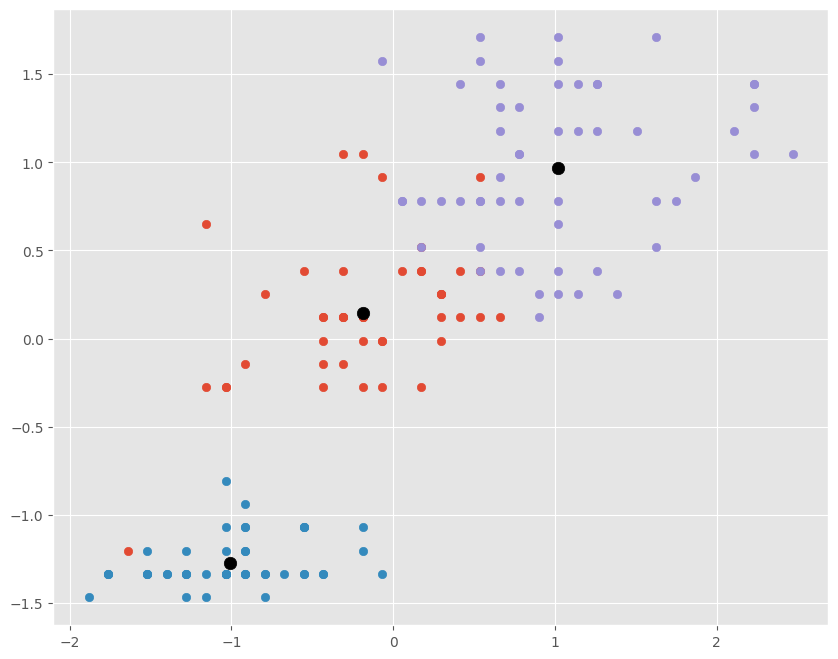

In [125]:
km = KMeans(n_clusters=3)

X, y = get_X_y(data, FEATURES, TARGET)

km.fit(X, y)
pred = km.predict(X)
centroids = km.cluster_centers_
u_labels = np.unique(pred)

fig = plt.figure(figsize=(10,8))
for i in u_labels:
    plt.scatter(X[pred==i]['sepal_length'], X[pred==i]['petal_width'], label=i)
# for i in u_labels:
plt.scatter(centroids[:, 0], centroids[:, -1], s=80, color='black')
plt.show()

In [100]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
0,0.657817,0.331139,0.866872,1.444682
1,-1.520635,0.790361,-1.357737,-1.203301
2,-1.036535,0.331139,-1.471819,-1.335700
3,-1.520635,1.249582,-1.585902,-1.335700
4,-0.189359,-0.587304,0.410542,0.120690
...,...,...,...,...
120,-0.673459,1.479193,-1.300696,-1.335700
121,-0.068334,2.168025,-1.471819,-1.335700
122,-0.189359,3.086468,-1.300696,-1.070902
123,1.020892,-0.128082,0.695748,0.650287
